# 안녕하세요^^ 
# AIVLE 2차 미니 프로젝트에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

---

# 데이터 분석부터 먼저 시작해보겠습니다.

* "1. 데이터 불러오기 및 분석" 단계에서는 제공되는 데이터를 불러와 feature들을 확인 해보는 작업을 진행 합니다.

---

In [ ]:
# 필요 라이브러리부터 설치할께요.
%pip install pandas seaborn

---

## 기본 데이터 

* 21년도 데이터 train 데이터
* 22년도 데이터 test 데이터

[미세먼지 데이터]
* 21년도 미세먼지 데이터 : air_2021.csv
* 22년도 미세먼지 데이터 : air_2022.csv

[날씨 데이터]
* 21년도 날씨 데이터 : weather_2021.csv
* 22년도 날씨 데이터 : weather_2022.csv

---

# 1. 데이터 불러오기
## 서울시 미세먼지 데이터와 기상 데이터를 불러오도록 하겠습니다.

#### [실습문제1] 미세먼지 데이터 로딩
* Pandas 라이브러리를 활용해서 'air_2021.csv'파일을 'air_21' 변수에, 'air_2022.csv'파일을 'air_22' 변수에 저장하고 그 데이터를 확인하세요.
* 아래에 'Pandas'를 Import하고 두 개의 파일을 불러오고 Shape을 확인하는 소스코드를 작성하고 실행해보세요.
* 구분자(sep) : ','
* encoder = 'UTF-8'
* index_col = 0

In [66]:
# 필요한 라이브러리를 불러오세요.
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import scipy.stats as spst

from sklearn.metrics import *
from sklearn.preprocessing import *

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [478]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
air_21 = pd.read_csv('air_2021.csv', sep=',',encoding='utf-8', index_col=0)
air_22 = pd.read_csv('air_2022.csv', sep=',',encoding='utf-8', index_col=0)

In [479]:
air_21 = air_21.sort_values('측정일시')
air_21.reset_index(inplace=True)
air_21

,index,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,2208,서울 종로구,도시대기,111123,종로구,2021010101,0.002,0.5,0.022,0.016,24.0,14.0,서울 종로구 종로35가길 19
1,2209,서울 종로구,도시대기,111123,종로구,2021010102,0.002,0.6,0.018,0.020,25.0,14.0,서울 종로구 종로35가길 19
2,2210,서울 종로구,도시대기,111123,종로구,2021010103,0.002,0.6,0.013,0.025,27.0,16.0,서울 종로구 종로35가길 19
3,2211,서울 종로구,도시대기,111123,종로구,2021010104,0.003,0.6,0.011,0.027,23.0,13.0,서울 종로구 종로35가길 19
4,2212,서울 종로구,도시대기,111123,종로구,2021010105,0.003,0.6,0.008,0.032,24.0,14.0,서울 종로구 종로35가길 19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2203,서울 종로구,도시대기,111123,종로구,2021123120,0.003,0.4,0.025,0.020,26.0,8.0,서울 종로구 종로35가길 19
8756,2204,서울 종로구,도시대기,111123,종로구,2021123121,0.003,0.4,0.030,0.014,27.0,9.0,서울 종로구 종로35가길 19
8757,2205,서울 종로구,도시대기,111123,종로구,2021123122,0.003,0.4,0.033,0.011,20.0,8.0,서울 종로구 종로35가길 19
8758,2206,서울 종로구,도시대기,111123,종로구,2021123123,0.003,0.4,0.029,0.015,20.0,9.0,서울 종로구 종로35가길 19


In [449]:
air_22

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 종로구,도시대기,111123,종로구,2022010101,0.003,0.4,0.026,0.016,23.0,12.0,서울 종로구 종로35가길 19
1,서울 종로구,도시대기,111123,종로구,2022010102,0.003,0.4,0.022,0.020,20.0,9.0,서울 종로구 종로35가길 19
2,서울 종로구,도시대기,111123,종로구,2022010103,0.003,0.5,0.014,0.028,20.0,9.0,서울 종로구 종로35가길 19
3,서울 종로구,도시대기,111123,종로구,2022010104,0.003,0.5,0.016,0.027,19.0,10.0,서울 종로구 종로35가길 19
4,서울 종로구,도시대기,111123,종로구,2022010105,0.003,0.5,0.005,0.040,24.0,11.0,서울 종로구 종로35가길 19
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,서울 종로구,도시대기,111123,종로구,2022033120,0.002,0.4,0.036,0.017,11.0,8.0,서울 종로구 종로35가길 19
2156,서울 종로구,도시대기,111123,종로구,2022033121,0.002,0.4,0.032,0.018,10.0,7.0,서울 종로구 종로35가길 19
2157,서울 종로구,도시대기,111123,종로구,2022033122,0.003,0.3,0.038,0.013,11.0,5.0,서울 종로구 종로35가길 19
2158,서울 종로구,도시대기,111123,종로구,2022033123,0.003,0.3,0.036,0.015,11.0,5.0,서울 종로구 종로35가길 19


In [376]:
air_21['측정일시'] = air_21['측정일시'].astype(str)
air_22['측정일시'] = air_22['측정일시'].astype(str)

In [377]:
air_21['월'] = air_21['측정일시'].str.slice(start=4,stop=6)
air_21['시간'] = air_21['측정일시'].str.slice(start=8)

air_22['월'] = air_22['측정일시'].str.slice(start=4,stop=6)
air_22['시간'] = air_22['측정일시'].str.slice(start=8)

air_21['년'] = air_21['측정일시'].str.slice(start=0,stop=4)
air_22['년'] = air_22['측정일시'].str.slice(start=0,stop=4)

# air_21['y'] = air_21['PM10'].shift(-1)
# air_22['y'] = air_22['PM10'].shift(-1)

# air_21 = air_21.iloc[:-1 , :]
# air_22 = air_22.iloc[:-1 , :]

In [378]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
air_21.shape, air_22.shape


((8760, 15), (2160, 15))

In [409]:
air_21.head(25)

,년,월,시간,SO2,CO,O3,NO2,PM10,PM25
0,2021,10,01,0.003,0.6,0.002,0.039,31.0,18.0
1,2021,10,02,0.003,0.6,0.002,0.035,27.0,16.0
2,2021,10,03,0.003,0.6,0.002,0.033,28.0,18.0
3,2021,10,04,0.003,0.6,0.002,0.030,26.0,16.0
4,2021,10,05,0.003,0.5,0.003,0.026,26.0,16.0
5,2021,10,06,0.003,0.5,0.002,0.025,22.0,14.0
6,2021,10,07,0.003,0.5,0.002,0.024,25.0,14.0
7,2021,10,08,0.003,0.5,0.005,0.023,24.0,14.0
8,2021,10,09,0.003,0.5,0.011,0.020,23.0,12.0
9,2021,10,10,0.003,0.6,0.026,0.016,40.0,22.0


In [438]:
air_22

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 종로구,도시대기,111123,종로구,2022010101,0.003,0.4,0.026,0.016,23.0,12.0,서울 종로구 종로35가길 19
1,서울 종로구,도시대기,111123,종로구,2022010102,0.003,0.4,0.022,0.020,20.0,9.0,서울 종로구 종로35가길 19
2,서울 종로구,도시대기,111123,종로구,2022010103,0.003,0.5,0.014,0.028,20.0,9.0,서울 종로구 종로35가길 19
3,서울 종로구,도시대기,111123,종로구,2022010104,0.003,0.5,0.016,0.027,19.0,10.0,서울 종로구 종로35가길 19
4,서울 종로구,도시대기,111123,종로구,2022010105,0.003,0.5,0.005,0.040,24.0,11.0,서울 종로구 종로35가길 19
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,서울 종로구,도시대기,111123,종로구,2022033120,0.002,0.4,0.036,0.017,11.0,8.0,서울 종로구 종로35가길 19
2156,서울 종로구,도시대기,111123,종로구,2022033121,0.002,0.4,0.032,0.018,10.0,7.0,서울 종로구 종로35가길 19
2157,서울 종로구,도시대기,111123,종로구,2022033122,0.003,0.3,0.038,0.013,11.0,5.0,서울 종로구 종로35가길 19
2158,서울 종로구,도시대기,111123,종로구,2022033123,0.003,0.3,0.036,0.015,11.0,5.0,서울 종로구 종로35가길 19


In [116]:
air_22.head()

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소,월,시간,y
0,서울 종로구,도시대기,111123,종로구,2022010101,0.003,0.4,0.026,0.016,23.0,12.0,서울 종로구 종로35가길 19,01,01,20.0
1,서울 종로구,도시대기,111123,종로구,2022010102,0.003,0.4,0.022,0.020,20.0,9.0,서울 종로구 종로35가길 19,01,02,20.0
2,서울 종로구,도시대기,111123,종로구,2022010103,0.003,0.5,0.014,0.028,20.0,9.0,서울 종로구 종로35가길 19,01,03,19.0
3,서울 종로구,도시대기,111123,종로구,2022010104,0.003,0.5,0.016,0.027,19.0,10.0,서울 종로구 종로35가길 19,01,04,24.0
4,서울 종로구,도시대기,111123,종로구,2022010105,0.003,0.5,0.005,0.040,24.0,11.0,서울 종로구 종로35가길 19,01,05,19.0


In [34]:
air_22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      2160 non-null   object 
 1   망       2160 non-null   object 
 2   측정소코드   2160 non-null   int64  
 3   측정소명    2160 non-null   object 
 4   측정일시    2160 non-null   int64  
 5   SO2     2139 non-null   float64
 6   CO      2139 non-null   float64
 7   O3      2139 non-null   float64
 8   NO2     2139 non-null   float64
 9   PM10    2122 non-null   float64
 10  PM25    2135 non-null   float64
 11  주소      2160 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 219.4+ KB


#### [실습문제2] 날씨 데이터 로딩
* Pandas 라이브러리를 활용해서 'weather_2021.csv'파일을 'weather_21' 변수에, 'weather_2022.csv'파일을 'weather_22' 변수에 저장하고 그 데이터를 확인하세요.
* 아래에 'Pandas'를 Import하고 두 개의 파일을 불러오고 Shape을 확인하는 소스코드를 작성하고 실행해보세요.
* 구분자(sep) : ','
* encoder = 'cp949'

In [450]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
wt_21 = pd.read_csv('weather_2021.csv', sep=',',encoding='cp949')
wt_22 = pd.read_csv('weather_2022.csv', sep=',',encoding='cp949')

In [451]:
wt_21

,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),...,최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,108,서울,2021-01-01 01:00,-8.7,NaN,NaN,NaN,2.4,NaN,270.0,...,NaN,2000,NaN,NaN,-6.9,NaN,-1.0,-0.8,0.3,1.6
1,108,서울,2021-01-01 02:00,-9.1,NaN,NaN,NaN,1.6,NaN,270.0,...,NaN,2000,NaN,NaN,-7.1,NaN,-1.1,-0.8,0.3,1.6
2,108,서울,2021-01-01 03:00,-9.3,NaN,NaN,NaN,1.1,NaN,250.0,...,NaN,2000,NaN,NaN,-7.3,NaN,-1.2,-0.9,0.3,1.6
3,108,서울,2021-01-01 04:00,-9.3,NaN,NaN,NaN,0.3,NaN,0.0,...,NaN,2000,NaN,NaN,-7.5,NaN,-1.3,-1.0,0.2,1.5
4,108,서울,2021-01-01 05:00,-9.7,NaN,NaN,NaN,1.9,NaN,20.0,...,NaN,2000,NaN,NaN,-7.6,NaN,-1.3,-1.0,0.2,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,108,서울,2021-12-31 19:00,-6.4,NaN,NaN,NaN,2.2,NaN,250.0,...,NaN,2000,NaN,NaN,-4.5,NaN,-0.5,-0.7,-0.1,1.0
8755,108,서울,2021-12-31 20:00,-6.3,NaN,NaN,NaN,4.1,NaN,320.0,...,NaN,2000,NaN,NaN,-5.3,NaN,-0.6,-0.8,-0.1,1.0
8756,108,서울,2021-12-31 21:00,-6.7,NaN,NaN,NaN,4.8,NaN,320.0,...,NaN,2000,NaN,NaN,-5.7,NaN,-0.7,-0.8,-0.1,1.0
8757,108,서울,2021-12-31 22:00,-7.5,NaN,NaN,NaN,3.0,NaN,320.0,...,NaN,2000,NaN,NaN,-6.2,NaN,-0.8,-0.9,-0.2,1.0


In [452]:
wt_22

,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),...,최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,108,서울,2022-01-01 00:00,-8.5,NaN,NaN,NaN,1.9,NaN,320,...,NaN,2000,NaN,NaN,-7.0,NaN,-1.0,-1.0,-0.2,1.0
1,108,서울,2022-01-01 01:00,-9.2,NaN,NaN,NaN,1.8,NaN,270,...,NaN,2000,NaN,NaN,-7.2,NaN,-1.1,-1.1,-0.2,1.0
2,108,서울,2022-01-01 02:00,-9.5,NaN,NaN,NaN,1.2,NaN,270,...,NaN,2000,NaN,NaN,-7.5,NaN,-1.3,-1.2,-0.2,1.0
3,108,서울,2022-01-01 03:00,-9.3,NaN,NaN,NaN,1.4,NaN,290,...,NaN,2000,NaN,NaN,-7.6,NaN,-1.4,-1.2,-0.2,1.0
4,108,서울,2022-01-01 04:00,-9.6,NaN,NaN,NaN,1.7,NaN,340,...,NaN,2000,NaN,NaN,-7.6,NaN,-1.4,-1.3,-0.3,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,108,서울,2022-03-31 19:00,12.3,NaN,NaN,NaN,2.9,NaN,340,...,9.0,2000,NaN,NaN,10.0,NaN,12.6,11.8,11.0,10.2
2156,108,서울,2022-03-31 20:00,11.6,NaN,NaN,NaN,2.7,NaN,340,...,NaN,2000,NaN,NaN,8.9,NaN,12.2,11.6,11.0,10.3
2157,108,서울,2022-03-31 21:00,10.5,NaN,NaN,NaN,3.5,NaN,320,...,10.0,2000,NaN,NaN,7.8,NaN,11.8,11.4,11.0,10.4
2158,108,서울,2022-03-31 22:00,9.3,NaN,NaN,NaN,1.9,NaN,50,...,10.0,2000,NaN,NaN,7.3,NaN,11.4,11.1,10.9,10.5


In [453]:
wt_21['일시'] = pd.to_datetime(wt_21['일시'], format='%Y-%m-%d %H:%M:%S')
wt_21['월'] = wt_21['일시'].dt.month
wt_21['시간'] = wt_21['일시'].dt.hour
wt_21['년'] = wt_21['일시'].dt.year

wt_22['일시'] = pd.to_datetime(wt_22['일시'], format='%Y-%m-%d %H:%M:%S')
wt_22['월'] = wt_22['일시'].dt.month
wt_22['시간'] = wt_22['일시'].dt.hour
wt_22['년'] = wt_21['일시'].dt.year

In [454]:
wt_21.drop(columns=['지점','지점명','일시'], inplace=True)
wt_22.drop(columns=['지점','지점명','일시'], inplace=True)

In [178]:
# 데이터 프레임의 Shape을 확인합니다.
wt_21.shape, wt_22.shape


((8759, 41), (2160, 41))

In [432]:
wt_21.head(24)

,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),풍향 QC플래그,습도(%),습도 QC플래그,...,현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),월,시간,년
0,-8.7,0.0,NaN,NaN,2.4,0.0,270.0,0.0,68,0.0,...,NaN,-6.9,0.0,-1.0,-0.8,0.3,1.6,1,1,2021
1,-9.1,0.0,NaN,NaN,1.6,0.0,270.0,0.0,69,0.0,...,NaN,-7.1,0.0,-1.1,-0.8,0.3,1.6,1,2,2021
2,-9.3,0.0,NaN,NaN,1.1,0.0,250.0,0.0,70,0.0,...,NaN,-7.3,0.0,-1.2,-0.9,0.3,1.6,1,3,2021
3,-9.3,0.0,NaN,NaN,0.3,0.0,0.0,0.0,71,0.0,...,NaN,-7.5,0.0,-1.3,-1.0,0.2,1.5,1,4,2021
4,-9.7,0.0,NaN,NaN,1.9,0.0,20.0,0.0,72,0.0,...,NaN,-7.6,0.0,-1.3,-1.0,0.2,1.5,1,5,2021
5,-9.7,0.0,NaN,NaN,2.0,0.0,50.0,0.0,75,0.0,...,NaN,-7.4,0.0,-1.4,-1.1,0.2,1.5,1,6,2021
6,-9.3,0.0,NaN,NaN,1.6,0.0,50.0,0.0,71,0.0,...,NaN,-6.8,0.0,-1.4,-1.1,0.2,1.5,1,7,2021
7,-9.3,0.0,NaN,NaN,1.6,0.0,50.0,0.0,72,0.0,...,NaN,-7.3,0.0,-1.4,-1.1,0.1,1.5,1,8,2021
8,-8.6,0.0,NaN,NaN,2.5,0.0,20.0,0.0,74,0.0,...,NaN,-6.2,0.0,-1.4,-1.2,0.1,1.4,1,9,2021
9,-6.1,0.0,NaN,NaN,1.1,0.0,50.0,0.0,68,0.0,...,NaN,-3.4,0.0,-1.2,-1.1,0.1,1.4,1,10,2021


In [180]:
wt_22.head()

,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),...,현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),월,시간,냔
0,108,서울,2022-01-01 00:00:00,-8.5,NaN,NaN,NaN,1.9,NaN,320,...,NaN,-7.0,NaN,-1.0,-1.0,-0.2,1.0,1,0,2021
1,108,서울,2022-01-01 01:00:00,-9.2,NaN,NaN,NaN,1.8,NaN,270,...,NaN,-7.2,NaN,-1.1,-1.1,-0.2,1.0,1,1,2021
2,108,서울,2022-01-01 02:00:00,-9.5,NaN,NaN,NaN,1.2,NaN,270,...,NaN,-7.5,NaN,-1.3,-1.2,-0.2,1.0,1,2,2021
3,108,서울,2022-01-01 03:00:00,-9.3,NaN,NaN,NaN,1.4,NaN,290,...,NaN,-7.6,NaN,-1.4,-1.2,-0.2,1.0,1,3,2021
4,108,서울,2022-01-01 04:00:00,-9.6,NaN,NaN,NaN,1.7,NaN,340,...,NaN,-7.6,NaN,-1.4,-1.3,-0.3,1.0,1,4,2021


---

# 2. 다양한 변수 확인

#### [실습문제3] 미세먼지 데이터와 날씨 데이터의 다양한 변수를 확인해 보도록 하겠습니다

* 미세먼지 데이터 : https://www.airkorea.or.kr/web/last_amb_hour_data?pMENU_NO=123


* 날씨 데이터 : https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36

* 도메인 지식 습득과 함께 변수에 대한 정보를 직접 파악해 보세요.

In [63]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
air_21.columns

Index(['지역', '망', '측정소코드', '측정소명', '측정일시', 'SO2', 'CO', 'O3', 'NO2', 'PM10',
       'PM25', '주소', '월', '시간'],
      dtype='object')

In [64]:
air_21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      8760 non-null   object 
 1   망       8760 non-null   object 
 2   측정소코드   8760 non-null   int64  
 3   측정소명    8760 non-null   object 
 4   측정일시    8760 non-null   object 
 5   SO2     8648 non-null   float64
 6   CO      8680 non-null   float64
 7   O3      8663 non-null   float64
 8   NO2     8680 non-null   float64
 9   PM10    8655 non-null   float64
 10  PM25    8663 non-null   float64
 11  주소      8760 non-null   object 
 12  월       8760 non-null   object 
 13  시간      8760 non-null   object 
dtypes: float64(6), int64(1), object(7)
memory usage: 1.0+ MB


In [18]:
for c in list(air_21):
    print(c, air_21[c].unique())

지역 ['서울 종로구']
망 ['도시대기']
측정소코드 [111123]
측정소명 ['종로구']
측정일시 [2021100101 2021100102 2021100103 ... 2022033122 2022033123 2022033124]
SO2 [0.003 0.004 0.005 0.002   nan 0.006 0.001 0.007 0.008 0.01  0.011 0.009]
CO [0.6 0.5 0.4 0.3 0.7 0.8 nan 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.7 1.9 2.  1.6
 0.2]
O3 [0.002 0.003 0.005 0.011 0.026 0.031 0.035 0.04  0.051 0.059 0.064 0.07
 0.06  0.057 0.062 0.053 0.054 0.046 0.041 0.039 0.029 0.025 0.023 0.012
 0.015 0.02  0.033 0.042 0.069 0.071 0.061 0.036 0.022 0.019 0.007 0.006
 0.004 0.009 0.016 0.047 0.055 0.068 0.072 0.066 0.021 0.008 0.03  0.037
 0.043 0.032 0.034 0.024 0.013 0.014 0.017 0.018 0.028 0.01  0.038 0.027
 0.056 0.058   nan 0.044 0.045 0.049 0.05  0.048 0.001 0.052 0.    0.063
 0.078 0.087 0.08  0.076 0.067 0.065 0.077 0.073 0.074 0.081 0.085 0.091
 0.097 0.084 0.095 0.094 0.092 0.079 0.082 0.083 0.089 0.1   0.086 0.088
 0.118 0.115 0.098 0.075 0.099 0.102 0.11  0.131 0.129 0.137 0.108 0.09
 0.104 0.111 0.096 0.114 0.116 0.101 0.103 0.093 0.1

지역, 망, 측정코드, 측정장소, 측정소명, 주소 : 단일값

In [455]:
air_21.drop(columns=['지역','망','측정소코드','측정소명','측정일시','주소'], inplace=True)
air_22.drop(columns=['지역','망','측정소코드','측정소명','측정일시','주소'], inplace=True)

In [67]:
wt_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   지점             8759 non-null   int64         
 1   지점명            8759 non-null   object        
 2   일시             8759 non-null   datetime64[ns]
 3   기온(°C)         8759 non-null   float64       
 4   기온 QC플래그       0 non-null      float64       
 5   강수량(mm)        949 non-null    float64       
 6   강수량 QC플래그      1763 non-null   float64       
 7   풍속(m/s)        8757 non-null   float64       
 8   풍속 QC플래그       2 non-null      float64       
 9   풍향(16방위)       8757 non-null   float64       
 10  풍향 QC플래그       2 non-null      float64       
 11  습도(%)          8759 non-null   int64         
 12  습도 QC플래그       0 non-null      float64       
 13  증기압(hPa)       8759 non-null   float64       
 14  이슬점온도(°C)      8759 non-null   float64       
 15  현지기압(hPa)      8759 n

In [68]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
for c in list(wt_21):
    print(c, wt_21[c].unique())


지점 [108]
지점명 ['서울']
일시 ['2021-01-01T01:00:00.000000000' '2021-01-01T02:00:00.000000000'
 '2021-01-01T03:00:00.000000000' ... '2021-12-31T21:00:00.000000000'
 '2021-12-31T22:00:00.000000000' '2021-12-31T23:00:00.000000000']
기온(°C) [ -8.7  -9.1  -9.3  -9.7  -8.6  -6.1  -3.2  -1.1  -0.2   1.4   1.2  -0.7
  -1.4  -1.5  -1.6  -1.8  -2.6  -3.4  -4.1  -5.   -5.8  -6.3  -6.6  -7.4
  -8.3  -7.6  -6.   -5.3  -2.3  -1.7  -3.8  -4.2  -5.5  -7.3  -7.7  -8.
  -8.8  -9.   -5.7  -3.1  -2.4  -3.6  -4.4  -4.9  -5.9  -6.2  -6.5  -7.
  -7.1  -8.1  -5.6  -3.   -0.6  -0.4   0.    0.2  -0.3  -0.9  -0.5  -1.3
  -2.1  -2.5  -2.7  -3.9  -4.8  -5.2  -4.6  -4.5  -8.5  -9.5  -9.9 -10.3
 -10.6 -11.1 -11.2 -11.6 -11.7 -11.9 -10.7  -8.2  -2.2  -3.7  -5.1  -4.7
  -9.6 -13.2 -14.3 -15.  -15.6 -16.1 -16.4 -16.2 -15.3 -14.8 -13.8 -13.1
 -12.4 -12.3 -13.  -13.7 -14.2 -14.6 -14.9 -15.5 -15.9 -16.5 -16.9 -17.2
 -17.5 -17.8 -18.2 -18.5 -17.9 -14.5 -13.4 -12.2 -11.3 -12.6 -13.5 -14.1
 -15.2 -15.4 -15.1 -15.7 -16.  -16.3 -12.5

지점, 지점명 : 단일값  
기온 QC플래그, 습도 QC플래그, 현지기압 QC플래그, 해면기압 QC플래그, 일조 QC플래그, 일사 QC플래그 : NAN 단일  
강수량 QC플래그, 풍속 QC플래그, 풍향 QC플래그, 지면온도 QC플래그 : nan, 9  

---

# 3. 데이터 분석하기
+ KeyPoint : 데이터의 형태를 살펴보고 다양한 분석기법을 통해 모델링에 적합하도록 정제요소를 선별할 수 있다.
  * 관측치들의 패턴 탐색
  * 잘못된 자료들을 탐색
  * 변수들간의 관계 파악

In [65]:
# 시각화 한글폰트 설정

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

#### [실습문제4] 미세먼지 데이터 알아보기
* air_21,air_22 의 다양한 변수에 대하여 여러 그래프를 그려보고 인사이트를 도출해보세요.

In [102]:
def numeric_plot(data, col):
    print(col)
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.histplot(data=data, x=col, kde=True)
    plt.grid()

    plt.subplot(1,2,2)
    sns.boxplot(data=data, x=col)
    plt.show()

    q1 = data[col].quantile(.25)
    q3 = data[col].quantile(.75)
    iqr = q3 - q1
    min_iqr = max((q1 - (1.5*iqr)), data[col].min())
    max_iqr = min((q1 + (1.5*iqr)), data[col].max())
    count = 0
    if min_iqr != data[col].min():
        print(f'이상치 under : {min_iqr}')
        count += data.loc[data[col] < min_iqr, col].count()
    if max_iqr != data[col].max():
        print(f'이상치 over : {max_iqr}')
        count += data.loc[data[col] > max_iqr, col].count()
    
    print(f'이상치 데이터 : {count}')
    print('_____' * 30)

In [103]:
def classify_plot(data, col):
    print(col)
    plt.figure(figsize=(10,5))
    sns.countplot(data=data, x=col)
    plt.show()

### aire_21

In [104]:
air_21.columns

Index(['지역', '망', '측정소코드', '측정소명', '측정일시', 'SO2', 'CO', 'O3', 'NO2', 'PM10',
       'PM25', '주소', '월', '시간'],
      dtype='object')

In [105]:
air_21.isna().sum()

지역         0
망          0
측정소코드      0
측정소명       0
측정일시       0
SO2      112
CO        80
O3        97
NO2       80
PM10     105
PM25      97
주소         0
월          0
시간         0
dtype: int64

In [405]:
target = 'PM10'
num_col = ['SO2', 'CO', 'O3', 'NO2', 'PM10','PM25']
class_col = ['월', '시간']

In [406]:
drop_na = air_21.dropna(axis=0)
drop_na.shape

(8602, 9)

월


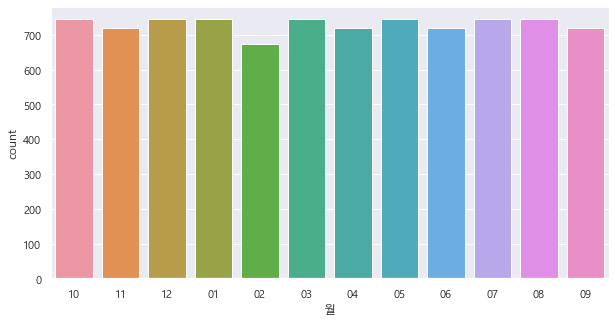

None
시간


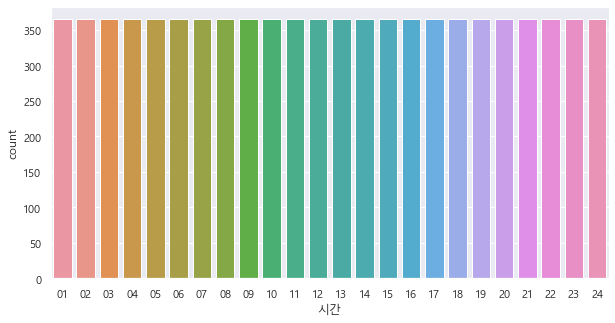

None


In [407]:
for c in class_col:
    print(classify_plot(air_21, c))

월


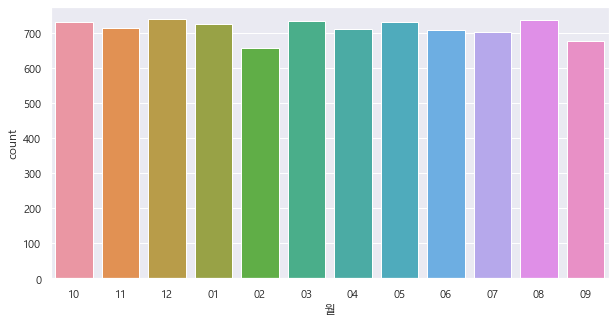

None
시간


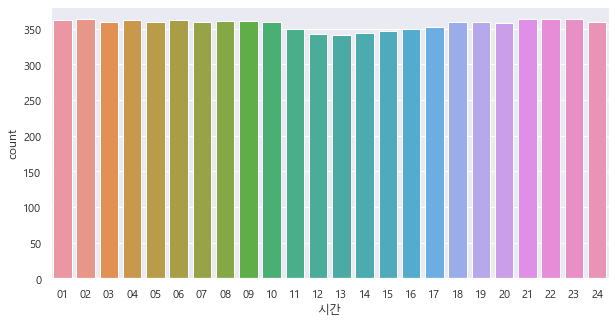

None


In [121]:
for c in class_col:
    print(classify_plot(drop_na, c))

SO2


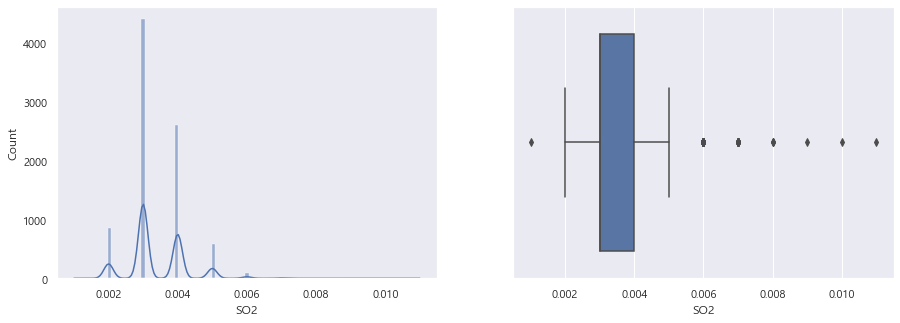

이상치 under : 0.0015
이상치 over : 0.0045000000000000005
이상치 데이터 : 698
______________________________________________________________________________________________________________________________________________________
None
CO


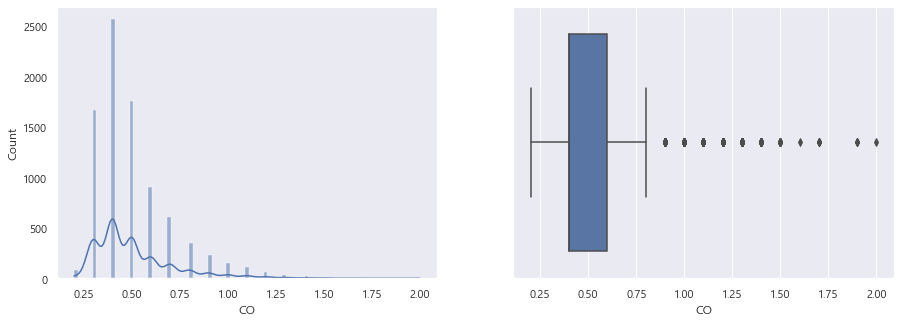

이상치 over : 0.7
이상치 데이터 : 983
______________________________________________________________________________________________________________________________________________________
None
O3


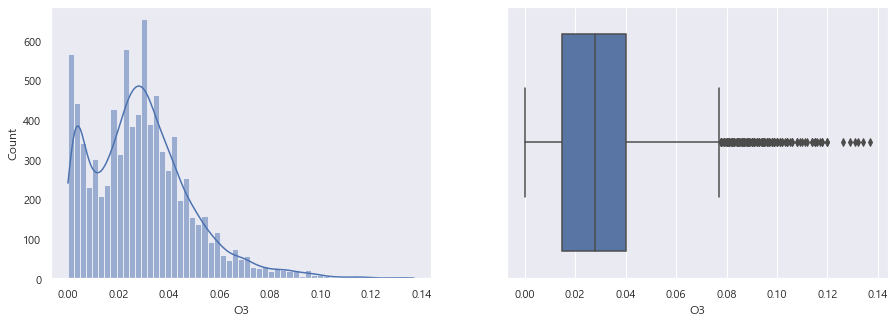

이상치 over : 0.052500000000000005
이상치 데이터 : 926
______________________________________________________________________________________________________________________________________________________
None
NO2


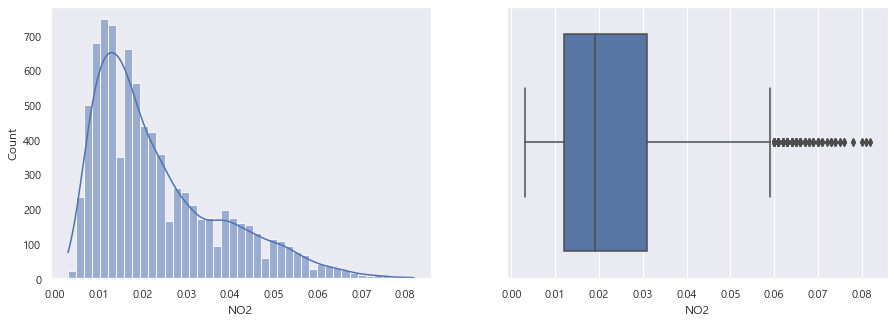

이상치 over : 0.040499999999999994
이상치 데이터 : 1255
______________________________________________________________________________________________________________________________________________________
None
PM10


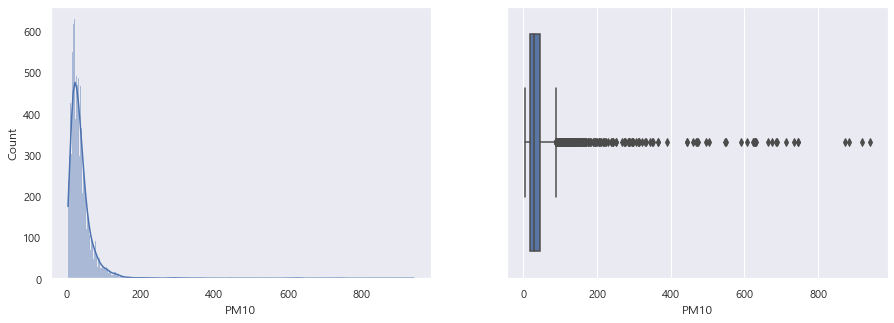

이상치 over : 60.0
이상치 데이터 : 1200
______________________________________________________________________________________________________________________________________________________
None
PM25


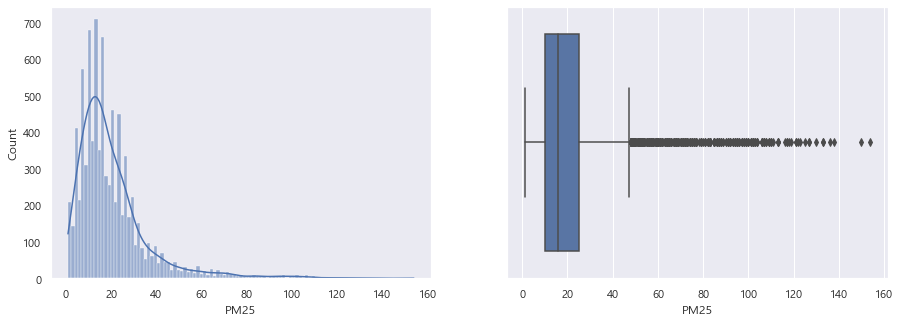

이상치 over : 32.5
이상치 데이터 : 1209
______________________________________________________________________________________________________________________________________________________
None


In [122]:
for c in num_col:
    print(numeric_plot(air_21, c))

<AxesSubplot:>

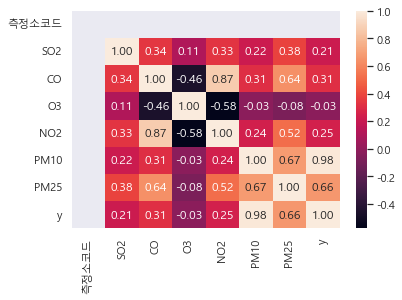

In [127]:
sns.heatmap(air_21.corr(), annot=True, fmt='.2f')

In [148]:
def target_class(data, target, col):
    print(col)
    plt.figure(figsize=(15,15))
    sns.barplot(data=data, x=col, y=target)
    plt.axhline(data[target].mean(), color='r')
    plt.show()


def target_num(data, target, col):
    print(col)
    plt.figure(figsize=(10,7))
    sns.regplot(data=data, x=col, y=target)
    plt.title(col)
    plt.grid()
    plt.show()
    result = spst.pearsonr(data[target], data[col])
    print(result)

월


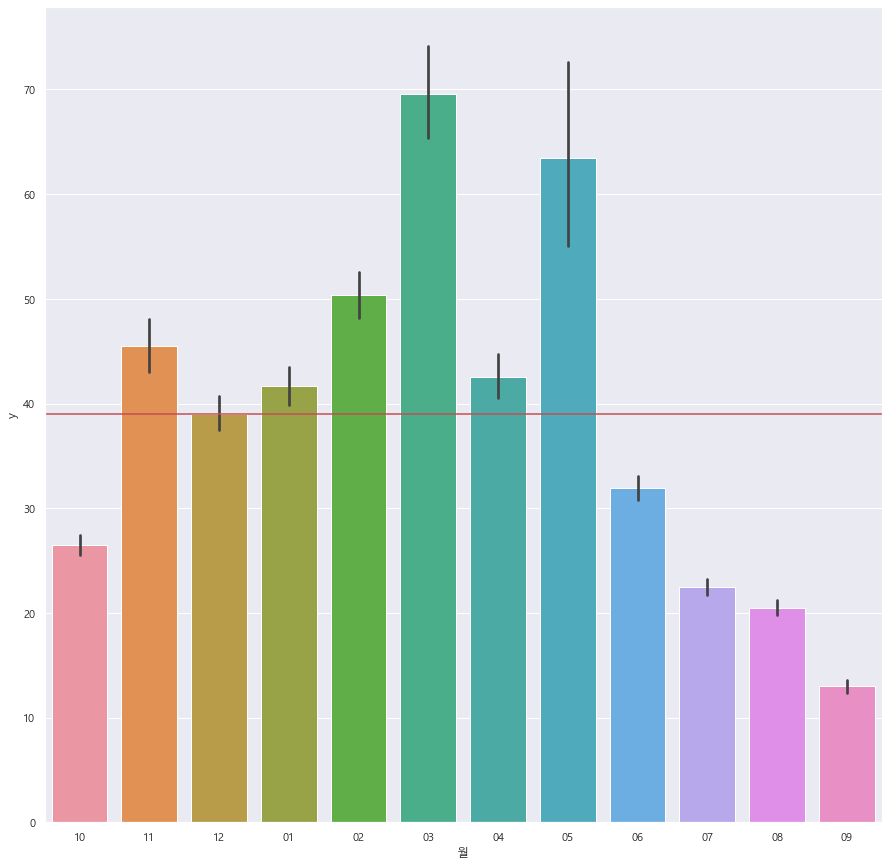

시간


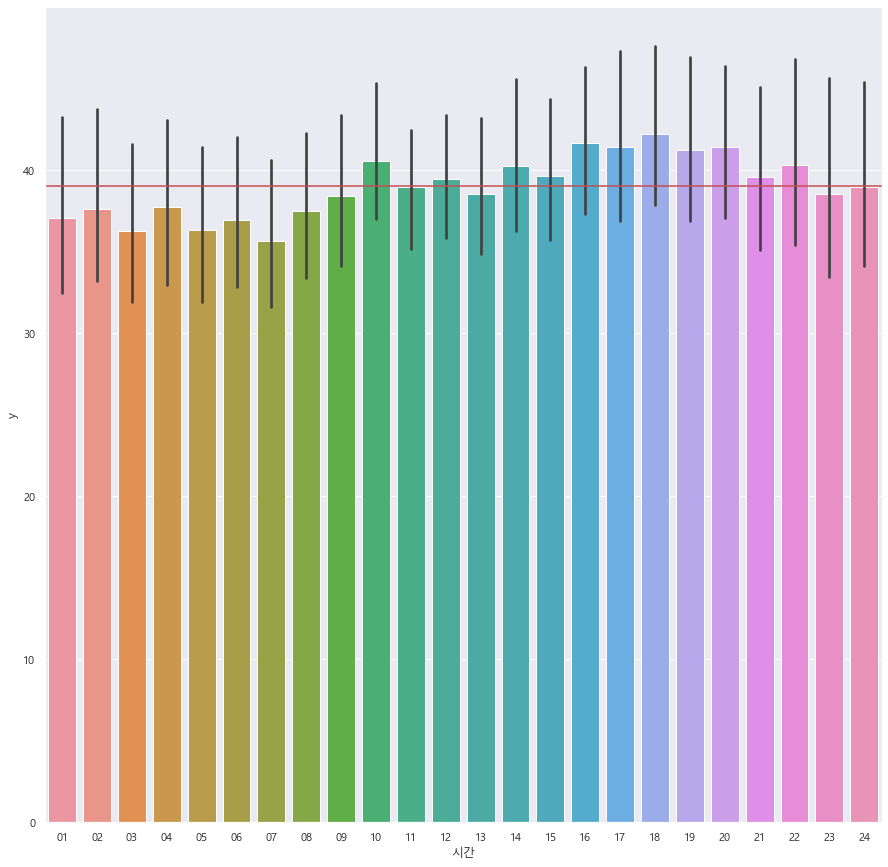

In [140]:
for c in class_col:
    target_class(air_21, target, c)

In [145]:
anova_list = []
for i in air_21['월'].unique():
    tmp = air_21.loc[air_21['월']==i, target]
    anova_list.append(tmp)

result = print(spst.f_oneway(anova_list[0],anova_list[1],anova_list[2],anova_list[3],anova_list[4],anova_list[5]
                            ,anova_list[6],anova_list[7],anova_list[8],anova_list[9],anova_list[10],anova_list[11]))

F_onewayResult(statistic=104.47269088659215, pvalue=2.0454232697409973e-224)


In [146]:
anova_list = []
for i in air_21['시간'].unique():
    tmp = air_21.loc[air_21['시간']==i, target]
    anova_list.append(tmp)

result = print(spst.f_oneway(anova_list[0],anova_list[1],anova_list[2],anova_list[3],anova_list[4],anova_list[5]
                            ,anova_list[6],anova_list[7],anova_list[8],anova_list[9],anova_list[10],anova_list[11]
                            ,anova_list[12],anova_list[13],anova_list[14],anova_list[15],anova_list[16],anova_list[17]
                            ,anova_list[18],anova_list[19],anova_list[20],anova_list[21],anova_list[22],anova_list[23]))

F_onewayResult(statistic=0.553388521675534, pvalue=0.9575221673866914)


SO2


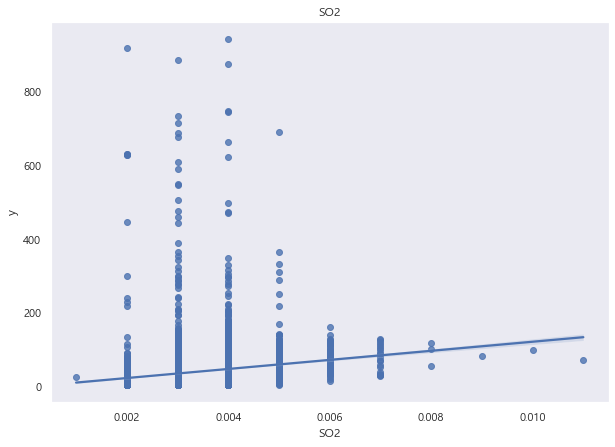

(0.2137494091361814, 4.4408044198706764e-89)
CO


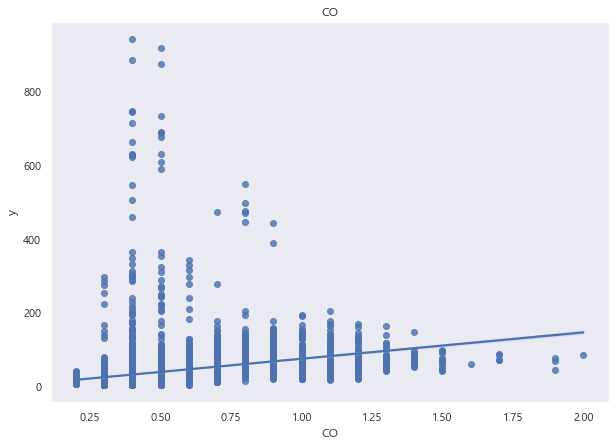

(0.31443200895792534, 7.332790579921845e-196)
O3


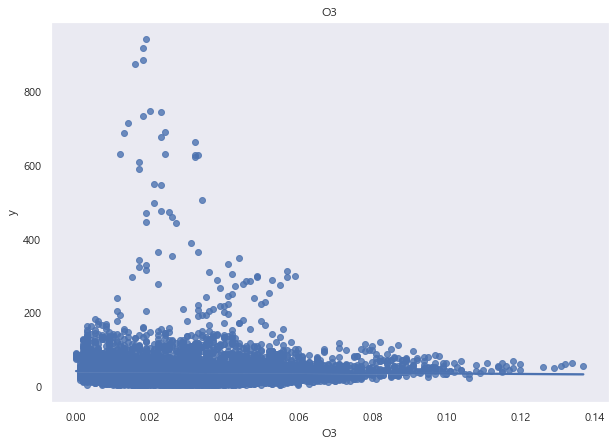

(-0.026843948361251962, 0.012976280114133045)
NO2


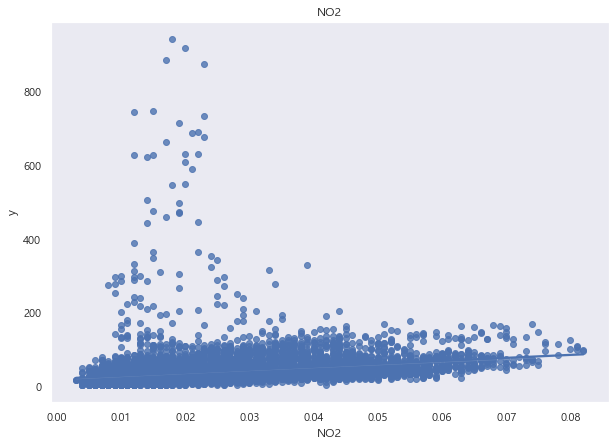

(0.2451792869525722, 1.857537901189184e-117)
PM10


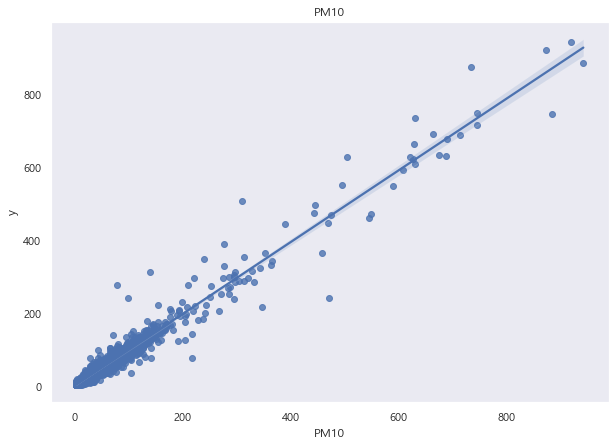

(0.9821246053379906, 0.0)
PM25


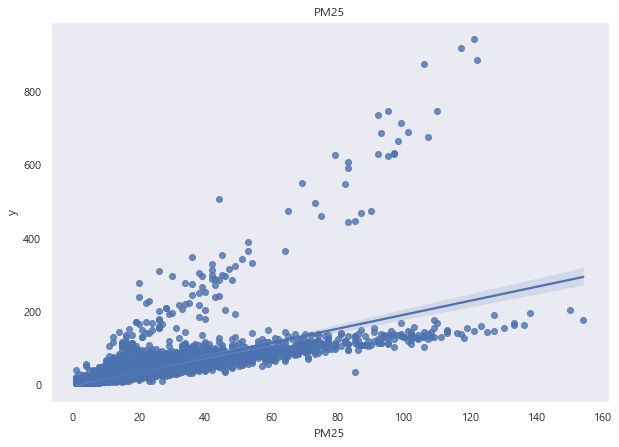

(0.6630568844673193, 0.0)


In [149]:
for c in num_col:
    target_num(air_21, target, c)

1. 'SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25' : 결측치 있음
2. 다음날 예측 미세먼지는 전날 미세먼지와 초미세먼지에 영향이 크다
3. 월에 영향을 받는다. 3월, 5월에 미세먼지 수치가 높다
4. 시간에는 영향 받지 않는다.
5. 전날의 미세먼지와 초미세먼지에 강한 관계가 있고 오존, 이산화질소, 이산화탄소에는 약한 관계가 있다.
6. 오존에는 영향이 없다.

#### [실습문제5] 날씨 데이터 알아보기
* weather_21, weather_22 의 다양한 변수에 대하여 여러 그래프를 그려보고 인사이트를 도출해보세요.

In [209]:
wt_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   기온(°C)         8759 non-null   float64
 1   기온 QC플래그       0 non-null      float64
 2   강수량(mm)        949 non-null    float64
 3   강수량 QC플래그      1763 non-null   float64
 4   풍속(m/s)        8757 non-null   float64
 5   풍속 QC플래그       2 non-null      float64
 6   풍향(16방위)       8757 non-null   float64
 7   풍향 QC플래그       2 non-null      float64
 8   습도(%)          8759 non-null   int64  
 9   습도 QC플래그       0 non-null      float64
 10  증기압(hPa)       8759 non-null   float64
 11  이슬점온도(°C)      8759 non-null   float64
 12  현지기압(hPa)      8759 non-null   float64
 13  현지기압 QC플래그     0 non-null      float64
 14  해면기압(hPa)      8759 non-null   float64
 15  해면기압 QC플래그     0 non-null      float64
 16  일조(hr)         4791 non-null   float64
 17  일조 QC플래그       3968 non-null   float64
 18  일사(MJ/m2

In [210]:
wt_21.columns

Index(['기온(°C)', '기온 QC플래그', '강수량(mm)', '강수량 QC플래그', '풍속(m/s)', '풍속 QC플래그',
       '풍향(16방위)', '풍향 QC플래그', '습도(%)', '습도 QC플래그', '증기압(hPa)', '이슬점온도(°C)',
       '현지기압(hPa)', '현지기압 QC플래그', '해면기압(hPa)', '해면기압 QC플래그', '일조(hr)',
       '일조 QC플래그', '일사(MJ/m2)', '일사 QC플래그', '적설(cm)', '3시간신적설(cm)',
       '전운량(10분위)', '중하층운량(10분위)', '운형(운형약어)', '최저운고(100m )', '시정(10m)',
       '지면상태(지면상태코드)', '현상번호(국내식)', '지면온도(°C)', '지면온도 QC플래그', '5cm 지중온도(°C)',
       '10cm 지중온도(°C)', '20cm 지중온도(°C)', '30cm 지중온도(°C)', '월', '시간', '년'],
      dtype='object')

지점, 지점명 : 단일값  
기온 QC플래그, 습도 QC플래그, 현지기압 QC플래그, 해면기압 QC플래그, 지면상태(지면상태코드) : NAN 단일  
강수량 QC플래그, 풍속 QC플래그, 풍향 QC플래그, 지면온도 QC플래그 : nan, 9  

### 플래그 종류(의미): 0(정상), 1(오류), 9(결측)
nan = 0 ??

In [211]:
wt_21.isna().sum()

기온(°C)              0
기온 QC플래그         8759
강수량(mm)          7810
강수량 QC플래그        6996
풍속(m/s)             2
풍속 QC플래그         8757
풍향(16방위)            2
풍향 QC플래그         8757
습도(%)               0
습도 QC플래그         8759
증기압(hPa)            0
이슬점온도(°C)           0
현지기압(hPa)           0
현지기압 QC플래그       8759
해면기압(hPa)           0
해면기압 QC플래그       8759
일조(hr)           3968
일조 QC플래그         4791
일사(MJ/m2)        3968
일사 QC플래그         4791
적설(cm)           8380
3시간신적설(cm)       8730
전운량(10분위)           2
중하층운량(10분위)         0
운형(운형약어)         3812
최저운고(100m )      4212
시정(10m)             0
지면상태(지면상태코드)     8759
현상번호(국내식)        6634
지면온도(°C)            5
지면온도 QC플래그       8735
5cm 지중온도(°C)        5
10cm 지중온도(°C)       5
20cm 지중온도(°C)       5
30cm 지중온도(°C)       5
월                   0
시간                  0
년                   0
dtype: int64

In [212]:
wt_21.shape

(8759, 38)

In [456]:
flag_col = ['기온 QC플래그', '풍속 QC플래그', '풍향 QC플래그', '습도 QC플래그', '현지기압 QC플래그', '해면기압 QC플래그', '지면온도 QC플래그', '일조 QC플래그', '일사 QC플래그']
wt_class_col = ['전운량(10분위)', '중하층운량(10분위)', '풍향(16방위)', '월', '시간', '년']
wt_num_col = ['기온(°C)', '풍속(m/s)', '습도(%)', '증기압(hPa)', '이슬점온도(°C)', '현지기압(hPa)', '해면기압(hPa)', '일조(hr)', '일사(MJ/m2)','시정(10m)', '지면온도(°C)', '5cm 지중온도(°C)', '10cm 지중온도(°C)', '20cm 지중온도(°C)', '30cm 지중온도(°C)']

In [417]:
len(flag_col),len(wt_class_col),len(wt_num_col)
# 30

(9, 6, 15)

In [457]:
nan_col = ['지면상태(지면상태코드)', '운형(운형약어)', '최저운고(100m )', '현상번호(국내식)',  '강수량 QC플래그']
nan_num = ['강수량(mm)', '적설(cm)', '3시간신적설(cm)']

In [458]:
len(nan_col),len(nan_num)
# 8

(5, 3)

In [459]:
# wt_21['운형(운형약어)'].unique()
wt_21.loc[(wt_21['현상번호(국내식)'] >= 40) & (wt_21['현상번호(국내식)'] <= 48)].groupby(by='월', as_index=False)['현상번호(국내식)'].count()

,월,현상번호(국내식)
0,1,18
1,2,51
2,3,139
3,4,31
4,5,43
5,6,3
6,7,2
7,10,3
8,11,28
9,12,16


In [460]:
wt_21.loc[(wt_21['현상번호(국내식)'] >= 40) & (wt_21['현상번호(국내식)'] <= 48)]['현상번호(국내식)'].unique()

array([42., 40.])

In [461]:
wt_21[flag_col] = wt_21[flag_col].fillna(0)
wt_22[flag_col] = wt_22[flag_col].fillna(0)

In [462]:
wt_21.isna().sum()

기온(°C)              0
기온 QC플래그            0
강수량(mm)          7810
강수량 QC플래그        6996
풍속(m/s)             2
풍속 QC플래그            0
풍향(16방위)            2
풍향 QC플래그            0
습도(%)               0
습도 QC플래그            0
증기압(hPa)            0
이슬점온도(°C)           0
현지기압(hPa)           0
현지기압 QC플래그          0
해면기압(hPa)           0
해면기압 QC플래그          0
일조(hr)           3968
일조 QC플래그            0
일사(MJ/m2)        3968
일사 QC플래그            0
적설(cm)           8380
3시간신적설(cm)       8730
전운량(10분위)           2
중하층운량(10분위)         0
운형(운형약어)         3812
최저운고(100m )      4212
시정(10m)             0
지면상태(지면상태코드)     8759
현상번호(국내식)        6634
지면온도(°C)            5
지면온도 QC플래그          0
5cm 지중온도(°C)        5
10cm 지중온도(°C)       5
20cm 지중온도(°C)       5
30cm 지중온도(°C)       5
월                   0
시간                  0
년                   0
dtype: int64

In [226]:
wt_22.isna().sum()

기온(°C)              0
기온 QC플래그            0
강수량(mm)          2079
강수량 QC플래그        1778
풍속(m/s)             0
풍속 QC플래그            0
풍향(16방위)            0
풍향 QC플래그            0
습도(%)               0
습도 QC플래그            0
증기압(hPa)            0
이슬점온도(°C)           0
현지기압(hPa)           0
현지기압 QC플래그          0
해면기압(hPa)           0
해면기압 QC플래그          0
일조(hr)           1089
일조 QC플래그            0
일사(MJ/m2)        1089
일사 QC플래그            0
적설(cm)           2020
3시간신적설(cm)       2145
전운량(10분위)           0
중하층운량(10분위)         0
운형(운형약어)         1221
최저운고(100m )      1417
시정(10m)             0
지면상태(지면상태코드)     2160
현상번호(국내식)        1742
지면온도(°C)            0
지면온도 QC플래그          0
5cm 지중온도(°C)        0
10cm 지중온도(°C)       0
20cm 지중온도(°C)       0
30cm 지중온도(°C)       0
월                   0
시간                  0
년                   0
dtype: int64

In [390]:
drop_col = nan_col + nan_num

In [463]:
drop_wt_21 = wt_21.drop(columns=drop_col)
drop_wt_22 = wt_22.drop(columns=drop_col)

In [466]:
drop_wt_21.isna().sum()

기온(°C)              0
기온 QC플래그            0
풍속(m/s)             2
풍속 QC플래그            0
풍향(16방위)            2
풍향 QC플래그            0
습도(%)               0
습도 QC플래그            0
증기압(hPa)            0
이슬점온도(°C)           0
현지기압(hPa)           0
현지기압 QC플래그          0
해면기압(hPa)           0
해면기압 QC플래그          0
일조(hr)           3968
일조 QC플래그            0
일사(MJ/m2)        3968
일사 QC플래그            0
전운량(10분위)           2
중하층운량(10분위)         0
시정(10m)             0
지면온도(°C)            5
지면온도 QC플래그          0
5cm 지중온도(°C)        5
10cm 지중온도(°C)       5
20cm 지중온도(°C)       5
30cm 지중온도(°C)       5
월                   0
시간                  0
년                   0
dtype: int64

In [465]:
drop_wt_22.isna().sum()

기온(°C)              0
기온 QC플래그            0
풍속(m/s)             0
풍속 QC플래그            0
풍향(16방위)            0
풍향 QC플래그            0
습도(%)               0
습도 QC플래그            0
증기압(hPa)            0
이슬점온도(°C)           0
현지기압(hPa)           0
현지기압 QC플래그          0
해면기압(hPa)           0
해면기압 QC플래그          0
일조(hr)           1089
일조 QC플래그            0
일사(MJ/m2)        1089
일사 QC플래그            0
전운량(10분위)           0
중하층운량(10분위)         0
시정(10m)             0
지면온도(°C)            0
지면온도 QC플래그          0
5cm 지중온도(°C)        0
10cm 지중온도(°C)       0
20cm 지중온도(°C)       0
30cm 지중온도(°C)       0
월                   0
시간                  0
년                   0
dtype: int64

In [467]:
air_21.isna().sum()

SO2     112
CO       80
O3       97
NO2      80
PM10    105
PM25     97
dtype: int64

In [468]:
air_22.isna().sum()

SO2     21
CO      21
O3      21
NO2     21
PM10    38
PM25    25
dtype: int64

In [464]:
air_21 = air_21[['SO2',	'CO',	'O3',	'NO2',	'PM10',	'PM25']]
air_22 = air_22[['SO2',	'CO',	'O3',	'NO2',	'PM10',	'PM25']]

In [469]:
wt_21.to_csv('wt_21.csv', index=False)
wt_22.to_csv('wt_22.csv', index=False)

drop_wt_21.to_csv('drop_wt_21.csv', index=False)
drop_wt_22.to_csv('drop_wt_22.csv', index=False)

In [470]:
air_21.to_csv('air_21.csv', index=False)
air_22.to_csv('air_22.csv', index=False)

In [423]:
air_21.shape, wt_21.shape

((8760, 6), (8759, 38))

In [424]:
air_22.shape, wt_22.shape

((2160, 6), (2160, 38))

In [471]:
data_21 = pd.concat([air_21, wt_21], axis=1)
data_22 = pd.concat([air_22, wt_22], axis=1)

In [472]:
data_21.shape,data_22.shape,

((8760, 44), (2160, 44))

In [473]:
data_21

,SO2,CO,O3,NO2,PM10,PM25,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,...,현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),월,시간,년
0,0.002,0.5,0.022,0.016,24.0,14.0,-8.7,0.0,NaN,NaN,...,NaN,-6.9,0.0,-1.0,-0.8,0.3,1.6,1.0,1.0,2021.0
1,0.002,0.6,0.018,0.020,25.0,14.0,-9.1,0.0,NaN,NaN,...,NaN,-7.1,0.0,-1.1,-0.8,0.3,1.6,1.0,2.0,2021.0
2,0.002,0.6,0.013,0.025,27.0,16.0,-9.3,0.0,NaN,NaN,...,NaN,-7.3,0.0,-1.2,-0.9,0.3,1.6,1.0,3.0,2021.0
3,0.003,0.6,0.011,0.027,23.0,13.0,-9.3,0.0,NaN,NaN,...,NaN,-7.5,0.0,-1.3,-1.0,0.2,1.5,1.0,4.0,2021.0
4,0.003,0.6,0.008,0.032,24.0,14.0,-9.7,0.0,NaN,NaN,...,NaN,-7.6,0.0,-1.3,-1.0,0.2,1.5,1.0,5.0,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,0.003,0.4,0.025,0.020,26.0,8.0,-6.3,0.0,NaN,NaN,...,NaN,-5.3,0.0,-0.6,-0.8,-0.1,1.0,12.0,20.0,2021.0
8756,0.003,0.4,0.030,0.014,27.0,9.0,-6.7,0.0,NaN,NaN,...,NaN,-5.7,0.0,-0.7,-0.8,-0.1,1.0,12.0,21.0,2021.0
8757,0.003,0.4,0.033,0.011,20.0,8.0,-7.5,0.0,NaN,NaN,...,NaN,-6.2,0.0,-0.8,-0.9,-0.2,1.0,12.0,22.0,2021.0
8758,0.003,0.4,0.029,0.015,20.0,9.0,-7.7,0.0,NaN,NaN,...,NaN,-6.5,0.0,-0.9,-0.9,-0.2,1.0,12.0,23.0,2021.0


In [474]:
data_21.to_csv('data_21.csv', index=False)
data_22.to_csv('data_22.csv', index=False)

In [475]:
drop_data_21 = pd.concat([air_21, drop_wt_21], axis=1)
drop_data_22 = pd.concat([air_22, drop_wt_22], axis=1)

In [476]:
air_22.shape, drop_wt_22.shape

((2160, 6), (2160, 30))

In [477]:
drop_data_21.to_csv('drop_data_21.csv', index=False)
drop_data_22.to_csv('drop_data_22.csv', index=False)